## Phase 1:
Setting up the Environment and Loading the Dataset

In [2]:
# Install Kaggle
!pip install -q kaggle

# Create a folder for Kaggle
!mkdir -p ~/.kaggle

# Copy the Kaggle API credentials to the folder
!cp kaggle.json ~/.kaggle/

# Set the permissions for the Kaggle API key
!chmod 600 ~/.kaggle/kaggle.json

# Download the Airbnb dataset
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

# Unzip the downloaded dataset
!unzip new-york-city-airbnb-open-data.zip


Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
License(s): CC0-1.0
new-york-city-airbnb-open-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  new-york-city-airbnb-open-data.zip
replace AB_NYC_2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: AB_NYC_2019.csv         
replace New_York_City_.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: New_York_City_.png      


In [3]:
import pandas as pd

# Load the Airbnb dataset
df = pd.read_csv('AB_NYC_2019.csv')
# Check the shape of the dataset (rows, columns)
df.shape

# Check the data types of each column
df.dtypes

# Check for missing values in each column
df.isnull().sum()

# Summary statistics of the numerical columns
df.describe()

# Sample 5 random rows from the dataset to see the data
df.sample(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19626,15716633,Bright Spacious BK Room with Bath,22118802,Sara,Brooklyn,Bushwick,40.70070,-73.92359,Private room,90,3,3,2016-12-01,0.09,1,0
34543,27390867,NYU/UNION SQRE/EAST VILLAGE-QUIET STUDIO EAST ...,200380610,Pranjal,Manhattan,Kips Bay,40.73865,-73.97810,Entire home/apt,185,30,0,NaN,NaN,65,364
26963,21357642,La Casa de Ishmael,154613793,Ishmael,Bronx,Concourse Village,40.82706,-73.91779,Private room,80,1,0,NaN,NaN,1,88
11690,9096630,Apartment in Lower Manhattan,23948552,Chikezie,Manhattan,Chinatown,40.71544,-73.99106,Private room,90,1,1,2015-10-28,0.02,1,0
48226,36144933,BEST DEAL 2 BR APT IN MANHATTAN! 6 BEDS AVAILA...,270583057,Reccie M.,Manhattan,Washington Heights,40.84366,-73.94018,Entire home/apt,195,5,0,NaN,NaN,1,270


## Phase 2:
Data Understanding

### Step 1: Handling Missing Data

First, let's identify and visualize the missing values. We'll start by looking at which columns have missing data and then decide how to handle them (e.g., remove rows, fill values).

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


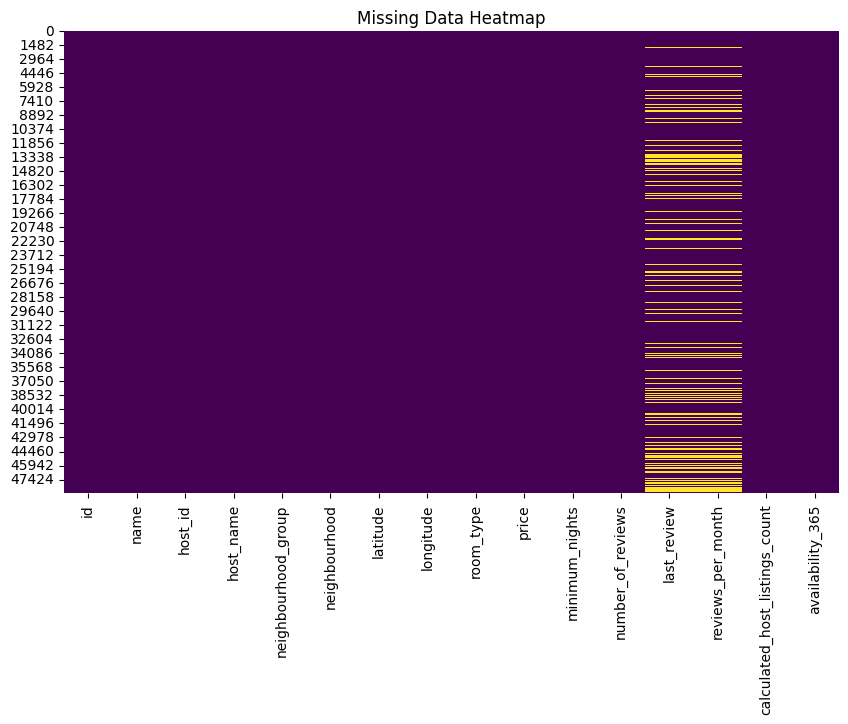

In [4]:
# Count missing values for each column
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

# Visualizing missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


### Step 2: Data Distribution
Let’s examine the distribution of key numerical features, such as price, number_of_reviews, and minimum_nights.

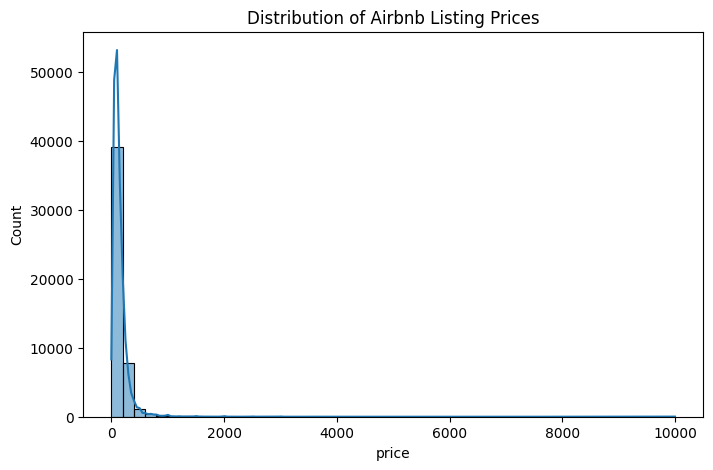

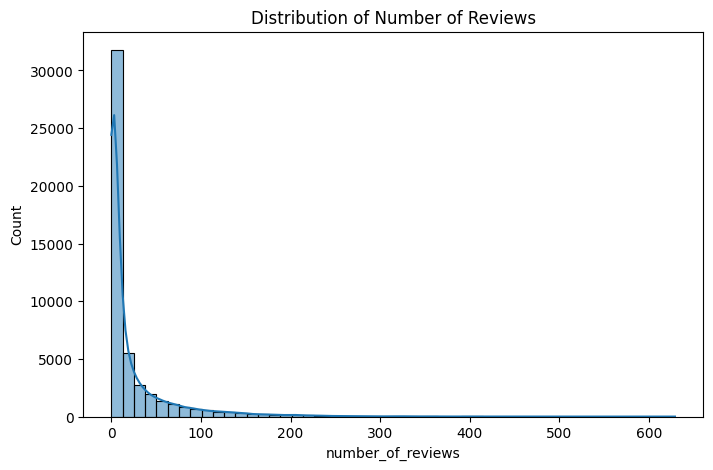

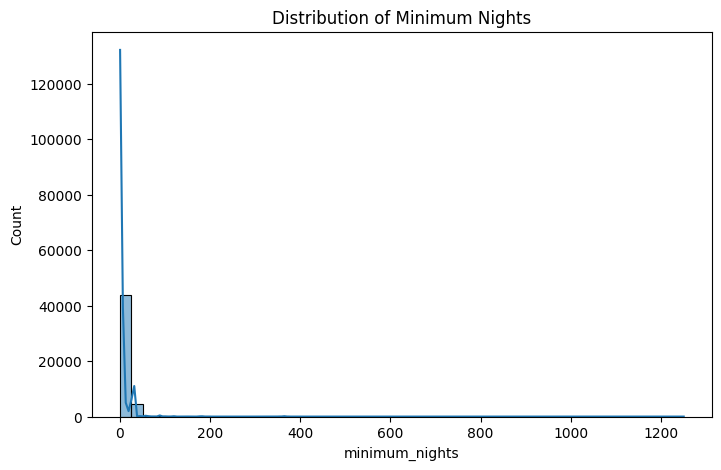

In [5]:
# Distribution of prices
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Listing Prices')
plt.show()

# Distribution of number of reviews
plt.figure(figsize=(8,5))
sns.histplot(df['number_of_reviews'], bins=50, kde=True)
plt.title('Distribution of Number of Reviews')
plt.show()

# Distribution of minimum nights
plt.figure(figsize=(8,5))
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title('Distribution of Minimum Nights')
plt.show()


### Step 3: Exploring Relationships Between Variables
Next, we'll explore the relationships between key features like price, number of bedrooms, and availability_365.

In [6]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


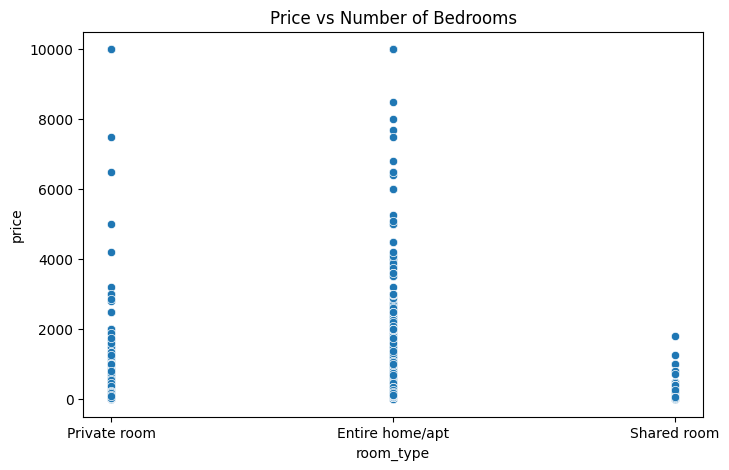

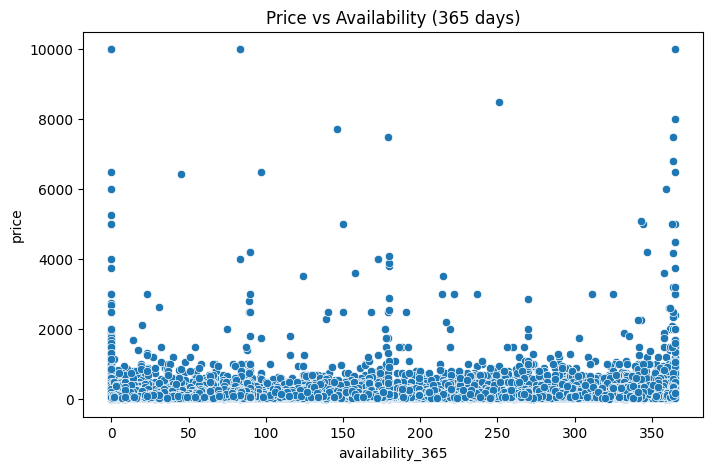

In [7]:
# Scatter plot to visualize relationship between price and number of bedrooms
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='room_type', y='price')
plt.title('Price vs Number of Bedrooms')
plt.show()

# Scatter plot to visualize relationship between price and availability_365
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='availability_365', y='price')
plt.title('Price vs Availability (365 days)')
plt.show()


### Step 4: Correlation Analysis
We will compute the correlation matrix for the numerical columns to understand the relationships between different variables.

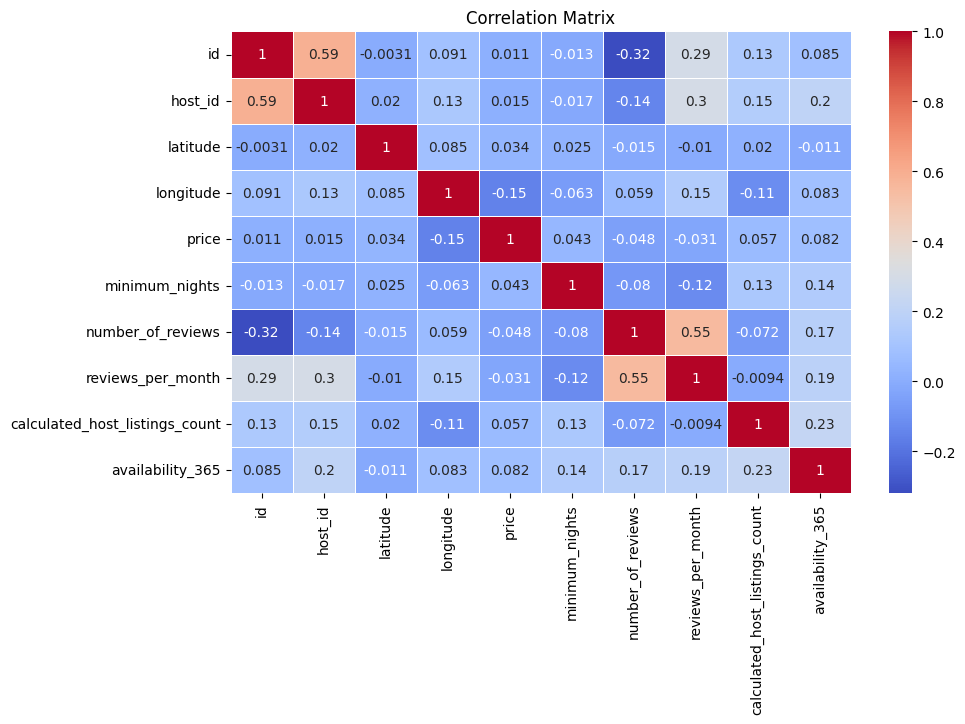

In [9]:
import numpy as np
# Correlation matrix of numerical features
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Plotting the heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Step 5: Understanding Categorical Features
Let’s explore some of the categorical features, such as neighbourhood_group and room_type, to see how they relate to the price.

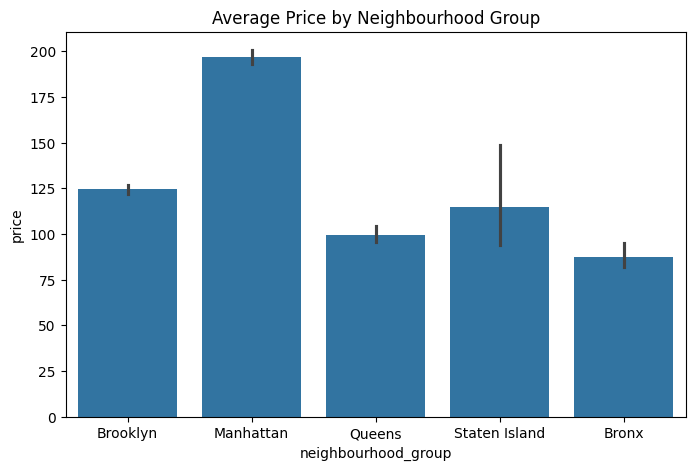

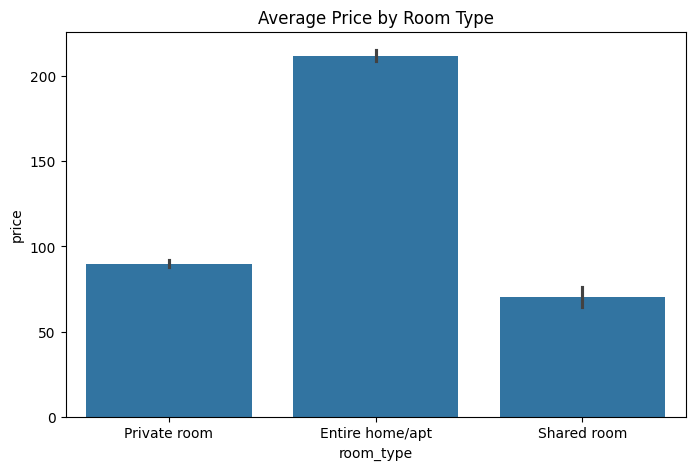

In [10]:
# Average price per neighbourhood group
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='neighbourhood_group', y='price')
plt.title('Average Price by Neighbourhood Group')
plt.show()

# Average price by room type
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='room_type', y='price')
plt.title('Average Price by Room Type')
plt.show()


## Phase 3: Data Preparation
Now that you've explored the dataset and gained a deeper understanding of the variables and relationships, the next phase is Data Preparation. In this stage, we will clean and transform the dataset to make it ready for modeling. The key tasks involve handling missing data, addressing outliers, encoding categorical variables, and splitting the data into training and testing sets.

### Step 1: Handling Missing Data
If we found missing data in key features during the exploration phase, we need to decide how to handle it. You can either remove rows with missing data or fill them with appropriate values (mean, median, etc.).

In [12]:
# Handling missing values
# Fill missing 'reviews_per_month' with 0 (assuming listings with no reviews have 0)
df['reviews_per_month'].fillna(0, inplace=True)

# Drop rows with missing values for important features (e.g., 'host_name', 'name')
df_cleaned = df.dropna(subset=['host_name', 'name'])

# Check if missing values are handled
df_cleaned.isnull().sum()


<ipython-input-12-c877a978cad2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### Step 2: Handling Outliers
Outliers can distort your model, especially in the price column. We’ll remove listings with extreme prices to ensure the model isn’t biased.

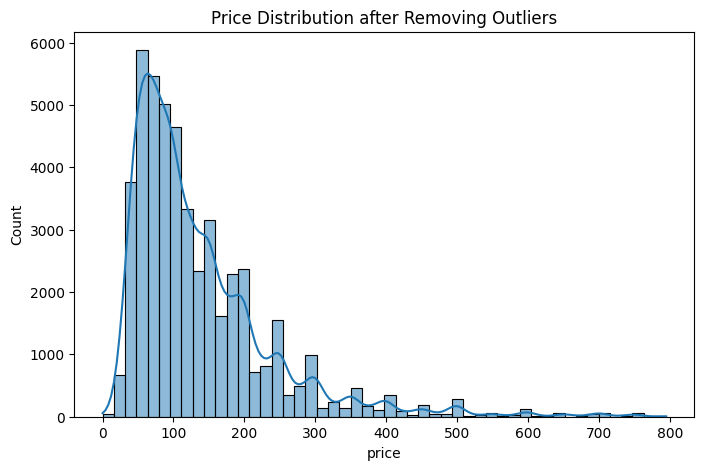

In [13]:
# Remove listings with prices that are extremely high (above 99th percentile)
upper_limit = df_cleaned['price'].quantile(0.99)
df_cleaned = df_cleaned[df_cleaned['price'] < upper_limit]

# Check the new distribution of price after removing outliers
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution after Removing Outliers')
plt.show()


### Step 3: Encoding Categorical Variables
Machine learning models often require categorical variables to be encoded as numerical data. We'll use one-hot encoding to convert categorical variables like neighbourhood_group and room_type into numerical values.

In [14]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Check the dataset after encoding
df_encoded.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,True,False,False,False,True,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,False,True,False,False,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,NaN,0.00,1,365,False,True,False,False,True,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,True,False,False,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,False,True,False,False,False,False


### Step 4: Feature Scaling
Some algorithms (e.g., gradient boosting, neural networks) benefit from scaled data. We’ll scale the numerical features like price, availability_365, and number_of_reviews using Min-Max scaling.

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical features for scaling
num_features = ['price', 'availability_365', 'number_of_reviews', 'minimum_nights']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

# Check the scaled features
df_encoded[num_features].head()


,price,availability_365,number_of_reviews,minimum_nights
0,0.187421,1.000000,0.014308,0.000000
1,0.283019,0.972603,0.071542,0.000000
2,0.188679,1.000000,0.000000,0.001601
3,0.111950,0.531507,0.429253,0.000000
4,0.100629,0.000000,0.014308,0.007206


### Step 5: Splitting Data into Training and Testing Sets
Finally, we’ll split the dataset into training and testing sets to ensure the model is evaluated on unseen data. We typically split the data 80% for training and 20% for testing.

In [16]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and target variable (y)
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape


((38692, 19), (9674, 19))

## Phase 4: Modeling
Now that the data is prepared, it's time to build and train machine learning models. In this phase, we will experiment with different algorithms to predict Airbnb listing prices. We’ll evaluate their performance and select the best model.

### Step 1: Building a Baseline Model
Let’s start by building a simple linear regression model. This baseline model will help us understand how well a basic model performs before trying more complex algorithms.

In [29]:
# Drop irrelevant columns like 'name' and 'host_name' if they exist
if 'name' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['name'])
if 'host_name' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['host_name'])

# Check if 'neighbourhood_group' and 'room_type' are present before one-hot encoding
if 'neighbourhood_group' in df_cleaned.columns and 'room_type' in df_cleaned.columns:
    # One-hot encoding for remaining categorical columns
    df_cleaned = pd.get_dummies(df_cleaned, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Check that all columns are now numerical
print(df_cleaned.dtypes)

# Define the features (X) and target (y)
X = df_cleaned.drop(['price'], axis=1)
y = df_cleaned['price']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Convert all columns in X_train to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce') # Converts non-numeric values to NaN
X_train = X_train.fillna(0) # Replaces NaN with 0

# Convert all columns in X_test to numeric as well
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)

rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2 Score: {r2_rf}")

id                                     int64
host_id                                int64
neighbourhood                         object
latitude                             float64
longitude                            float64
price                                  int64
minimum_nights                         int64
number_of_reviews                      int64
last_review                           object
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
neighbourhood_group_Brooklyn            bool
neighbourhood_group_Manhattan           bool
neighbourhood_group_Queens              bool
neighbourhood_group_Staten Island       bool
room_type_Private room                  bool
room_type_Shared room                   bool
dtype: object
Random Forest MSE: 5380.757429139962
Random Forest R2 Score: 0.4931356004905051


### Step 2: Trying a More Complex Model (Random Forest)
Now that we have a baseline, let’s try a more complex model like Random Forest, which tends to perform well on structured data like this.

In [30]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2 Score: {r2_rf}")


Random Forest MSE: 5380.757429139962
Random Forest R2 Score: 0.4931356004905051


### Step 3: Evaluating the Models
Once you’ve trained multiple models, you should compare their performance to decide which one to use. For example, you can compare the Mean Squared Error (MSE) and R-squared scores between the linear regression and Random Forest models. The model with a lower MSE and a higher R-squared score would typically be considered better.

### Step 4: Hyperparameter Tuning (Optional)
To improve model performance, you can tune the hyperparameters. For Random Forest, this might involve adjusting the number of trees, maximum depth, etc.

Here’s an example of how you might tune the hyperparameters of the Random Forest model using GridSearchCV:

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.utils import resample

# Assuming X_train, X_test, y_train, y_test are already defined

# Function to downsample the dataset
def downsample_data(X, y, n_samples=5000):
    if len(X) > n_samples:
        X_downsampled, y_downsampled = resample(X, y, n_samples=n_samples, random_state=42)
        return X_downsampled, y_downsampled
    return X, y

# Downsample the training data
X_train_downsampled, y_train_downsampled = downsample_data(X_train, y_train)

# Identify and drop object columns
object_columns = X_train_downsampled.select_dtypes(include=['object']).columns
X_train_downsampled = X_train_downsampled.drop(columns=object_columns)
X_test = X_test.drop(columns=object_columns)

# Select top 10 features based on correlation with target
correlations = X_train_downsampled.corrwith(y_train_downsampled).abs().sort_values(ascending=False)
top_features = correlations.head(10).index.tolist()
X_train_downsampled = X_train_downsampled[top_features]
X_test = X_test[top_features]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_downsampled)
X_test_scaled = scaler.transform(X_test)

# Define a simplified hyperparameter space
param_distributions = {
    'n_estimators': randint(50, 100),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10)
}

# Initialize the Random Forest model with reduced trees
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV with minimal iterations
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=10,  # Reduced number of iterations
    cv=2,  # Reduced number of cross-validation folds
    verbose=0,
    random_state=42,
    n_jobs=-1
)

# Fit the model with randomized search
random_search.fit(X_train_scaled, y_train_downsampled)

# Print the best parameters found by RandomizedSearchCV
print(f"Best Hyperparameters: {random_search.best_params_}")

# Use the best estimator to make predictions
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned Random Forest model's performance
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest MSE: {mse_best_rf}")
print(f"Tuned Random Forest R2 Score: {r2_best_rf}")

# Feature importance
feature_importance = best_rf_model.feature_importances_
for name, importance in sorted(zip(top_features, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{name}: {importance}")

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Best Hyperparameters: {'max_depth': 11, 'min_samples_split': 5, 'n_estimators': 78}
Tuned Random Forest MSE: 6301.148408041392
Tuned Random Forest R2 Score: 0.4064352749362652
room_type_Private room: 0.3324775965206108
longitude: 0.22479203507928608
latitude: 0.16877166069056604
availability_365: 0.11697172878150543
reviews_per_month: 0.06742673512269641
calculated_host_listings_count: 0.04421326714128369
room_type_Shared room: 0.03337825840688238
neighbourhood_group_Manhattan: 0.008753973960876927
neighbourhood_group_Brooklyn: 0.0016497556704174316
neighbourhood_group_Queens: 0.0015649886258747904


## Phase 5: Evaluation
In this phase, we will evaluate the model's performance more critically. This includes assessing how well the chosen model performs on unseen data and whether it meets the business objectives. We will also check for potential overfitting and analyze the model's strengths and weaknesses using various metrics.

### Step 1: Evaluating the Model with Metrics
We’ll focus on evaluating the model using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. These will give us a clearer understanding of how well the model predicts the Airbnb listing prices.

In [40]:
from sklearn.metrics import mean_squared_error, r2_score


# Compute the RMSE for the final model
rmse_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_best_rf)

print(f"Random Forest Model RMSE: {rmse_rf}")
print(f"Random Forest Model R-squared: {r2_rf}")


Random Forest Model RMSE: 79.37977329295789
Random Forest Model R-squared: 0.4064352749362652


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Step 2: Checking for Overfitting
To check if the model is overfitting (i.e., performing much better on the training data than on the test data), we can compare the performance on the training set and the test set.

In [41]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predictions on the training data
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate the model on the training data
rmse_train_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print(f"Random Forest Model Training RMSE: {rmse_train_rf}")
print(f"Random Forest Model Training R-squared: {r2_train_rf}")


Random Forest Model Training RMSE: 27.22401494340401
Random Forest Model Training R-squared: 0.9301825421274046


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Step 3: Residual Analysis
Residuals are the difference between the actual prices and the predicted prices. We want to make sure that the residuals are randomly distributed without any patterns, which would indicate the model is working well.

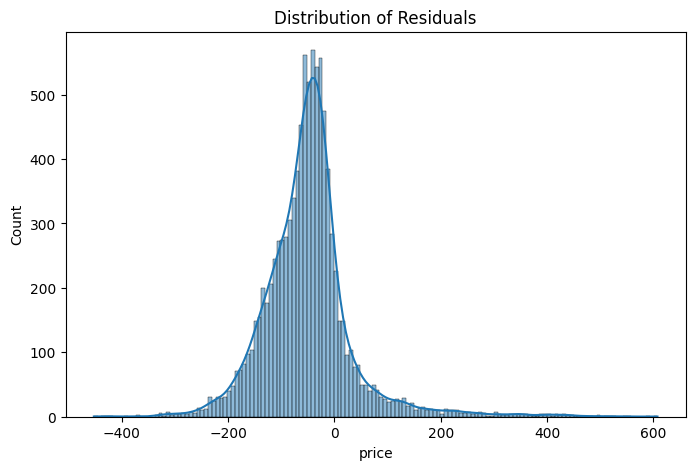

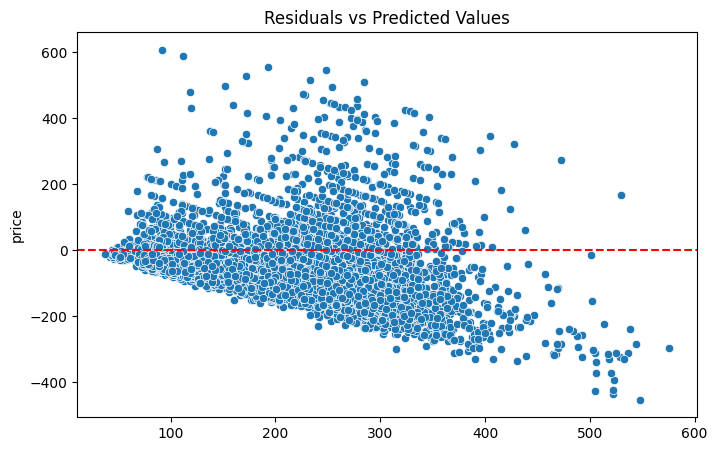

In [43]:
# Get missing columns
missing_cols = set(X_train.columns) - set(X_test.columns)

# Add missing columns to X_test with 0 values
for col in missing_cols:
    X_test[col] = 0

# Ensure column order matches X_train
X_test = X_test[X_train.columns]

rf_model.fit(X_train, y_train)

# Predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.show()

### Step 4: Meeting Business Objectives
Finally, you want to evaluate whether the model achieves the business objectives defined in the Business Understanding phase. In this case, does the model help identify key factors that influence Airbnb listing prices, and is it accurate enough to be used for pricing strategy?

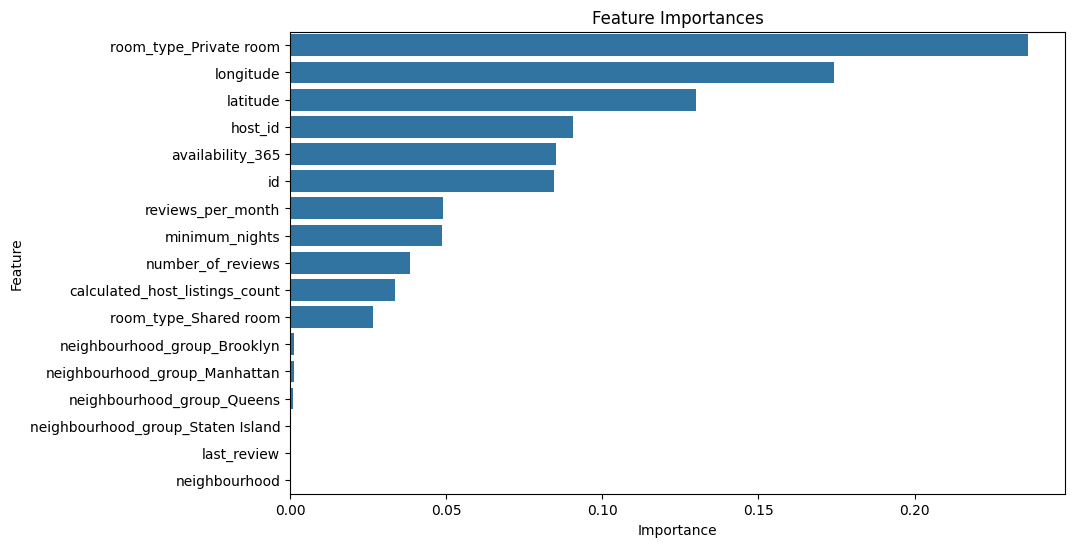

In [44]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


Phase 6: Deployment
In the final phase of the CRISP-DM process, we focus on deploying the model so that it can be used by the business or stakeholders to make decisions. This phase involves making the model accessible, integrating it into an application or service, and setting up mechanisms for ongoing monitoring and maintenance.

## Phase 6: Deployment
In the final phase of the CRISP-DM process, we focus on deploying the model so that it can be used by the business or stakeholders to make decisions. This phase involves making the model accessible, integrating it into an application or service, and setting up mechanisms for ongoing monitoring and maintenance.

### Step 1: Saving the Model
To deploy the model, the first step is to save the trained model so that it can be reused without needing to retrain it each time.

You can save the model using joblib or pickle in Python. Here's how you can do it:

In [ ]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'airbnb_price_prediction_model.pkl')

# Load the model (to demonstrate how it can be used in production)
loaded_model = joblib.load('airbnb_price_prediction_model.pkl')

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)


### Step 2: Creating an API for the Model
To allow other applications (e.g., web applications, mobile apps) to interact with your model, you can deploy it via an API. Using a simple Python framework like Flask, you can create an API to serve predictions.

Here’s an example of how you can set up an API for the model using Flask:

In [ ]:
# Install Flask if needed
!pip install Flask

# Create the Flask app
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the saved model
model = joblib.load('airbnb_price_prediction_model.pkl')

# Define a route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the request
    data = request.get_json(force=True)

    # Convert the data into the appropriate format (you will need to ensure the data matches the model's input format)
    input_data = [data['features']]

    # Make the prediction
    prediction = model.predict(input_data)

    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction[0]})

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)


### Step 3: Setting Up Monitoring and Retraining
Once the model is deployed, it’s important to monitor its performance over time to ensure it remains accurate. If the model starts to perform poorly (e.g., due to changes in the market or data patterns), you may need to retrain it.

You can set up regular evaluations to compare the model's predictions against actual prices, and if performance drops, retrain the model with updated data.

Here’s a simple outline of what you can do for monitoring:

Track model performance metrics (e.g., RMSE, R-squared) over time.
Log errors and discrepancies between predicted and actual prices.
Set up alerts for when performance falls below a threshold.

### Step 4: Creating a User Interface (Optional)
If needed, you can create a simple user interface (UI) where Airbnb hosts or analysts can input details like neighborhood, room type, etc., and the model will return a price prediction. This can be done using web frameworks like Streamlit or Flask, or even a desktop app using Tkinter.

Here’s an example of a UI with Streamlit:

In [ ]:
# Install Streamlit if needed
!pip install streamlit

# Create a Streamlit app
import streamlit as st
import joblib

# Load the model
model = joblib.load('airbnb_price_prediction_model.pkl')

# Define the app interface
st.title('Airbnb Price Prediction')

# Collect user input
neighbourhood_group = st.selectbox('Neighbourhood Group', ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'])
room_type = st.selectbox('Room Type', ['Entire home/apt', 'Private room', 'Shared room'])
accommodates = st.slider('Accommodates', 1, 10)
minimum_nights = st.number_input('Minimum Nights', min_value=1)

# Make the prediction when the user clicks the button
if st.button('Predict'):
    input_data = [[accommodates, minimum_nights]]  # Add any other features you're using
    prediction = model.predict(input_data)
    st.write(f"Predicted Price: ${prediction[0]:.2f}")
